In [1]:
import pandas as pd

import numpy as np
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk import FreqDist
nltk.download('stopwords') 
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim
import spacy

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shefalibansal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shefalibansal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# !python -m spacy download en # one time run

In [3]:
data=pd.read_csv('hiv_test.csv')

In [4]:
data.head()

,Date,Title,article
0,"Posted:, Fri May 09 1997 IST",Drug cocktail to wipe out HIV will take 3 years,", LONDON, May 8: Drugs meant to wipe out the ..."
1,"Posted:, Sun Jun 22 1997 IST",Book on healthy living for HIV positives,", CHENNAI, June 20: The Tamil Nadu State AIDS..."
2,"Posted:, Mon Aug 04 1997 IST",Testing HIV-positive is not the end of the road,", August 3: A skit on HIV-AIDS is in progress..."
3,"Posted:, Sun Nov 30 1997 IST",HIV positive student deported,", AURANGABAD, November 29: A girl student fro..."
4,"Posted:, Sat Nov 22 1997 IST","World Vignettes -- ""Weapon"" to counter HIV virus",", WASHINGTON: It may take a virus to kill a v..."


In [5]:
data.shape

(780, 3)

In [6]:
data['day']=data['Date']
data['month']=data['Date']
data['year']=data['Date']

In [7]:
# nlp = spacy.load('en', disable=['parser', 'ner'])
def process_data(data):
    lmtzr = WordNetLemmatizer()
    doc = re.sub('[^a-zA-z\s]','',str(data))
  
    doc=word_tokenize(doc)
    t1=[]
#     tags=['NOUN', 'ADJ']
    for i in doc:
#         if i.pos_ in tags:
        t1.append(lmtzr.lemmatize(i).lower())
    return " ".join(t1)

<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: Dep

In [8]:
for i in range(data.shape[0]):
    data['article'][i]=process_data(data['article'][i])
    data['Title'][i]=process_data(data['Title'][i])
    

In [9]:
data.head()

,Date,Title,article,day,month,year
0,"Posted:, Fri May 09 1997 IST",drug cocktail to wipe out hiv will take year,london may drugs meant to wipe out the hiv vir...,"Posted:, Fri May 09 1997 IST","Posted:, Fri May 09 1997 IST","Posted:, Fri May 09 1997 IST"
1,"Posted:, Sun Jun 22 1997 IST",book on healthy living for hiv positive,chennai june the tamil nadu state aids control...,"Posted:, Sun Jun 22 1997 IST","Posted:, Sun Jun 22 1997 IST","Posted:, Sun Jun 22 1997 IST"
2,"Posted:, Mon Aug 04 1997 IST",testing hivpositive is not the end of the road,august a skit on hivaids is in progress but ye...,"Posted:, Mon Aug 04 1997 IST","Posted:, Mon Aug 04 1997 IST","Posted:, Mon Aug 04 1997 IST"
3,"Posted:, Sun Nov 30 1997 IST",hiv positive student deported,aurangabad november a girl student from uganda...,"Posted:, Sun Nov 30 1997 IST","Posted:, Sun Nov 30 1997 IST","Posted:, Sun Nov 30 1997 IST"
4,"Posted:, Sat Nov 22 1997 IST",world vignettes weapon to counter hiv virus,washington it may take a virus to kill a virus...,"Posted:, Sat Nov 22 1997 IST","Posted:, Sat Nov 22 1997 IST","Posted:, Sat Nov 22 1997 IST"


In [10]:

month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
year=[str(i) for i in range(1950,2020)]
for i in range(data.shape[0]):
    temp=data['Date'][i]
    temp=word_tokenize(temp.lower())
    for j in temp:
        if len(j)==2 and j[0]>='0' and j[1]>='0' and j[0]<='9'and j[1] <='9':
            data['day'][i]=j
        elif j in year:
            data['year'][i]=j
        elif j[0:3] in month:
            data['month'][i]=j[0:3]
        else:
            continue
        
    
            

In [11]:
data['year'].unique()

array(['1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype=object)

In [12]:
month={'jan':'01','feb':'02','mar':'03','apr':'04','may':'05','jun':'06','jul':'07','aug':'08','sep':'09','oct':'10','nov':'11','dec':'12'}
       
def getNumber(str):
    return month[str]

data["months"]=data["month"].apply(getNumber)
data.head()

,Date,Title,article,day,month,year,months
0,"Posted:, Fri May 09 1997 IST",drug cocktail to wipe out hiv will take year,london may drugs meant to wipe out the hiv vir...,09,may,1997,05
1,"Posted:, Sun Jun 22 1997 IST",book on healthy living for hiv positive,chennai june the tamil nadu state aids control...,22,jun,1997,06
2,"Posted:, Mon Aug 04 1997 IST",testing hivpositive is not the end of the road,august a skit on hivaids is in progress but ye...,04,aug,1997,08
3,"Posted:, Sun Nov 30 1997 IST",hiv positive student deported,aurangabad november a girl student from uganda...,30,nov,1997,11
4,"Posted:, Sat Nov 22 1997 IST",world vignettes weapon to counter hiv virus,washington it may take a virus to kill a virus...,22,nov,1997,11


In [13]:
data['months'].unique()

array(['05', '06', '08', '11', '12', '01', '02', '07', '09', '10', '03',
       '04'], dtype=object)

In [14]:
x=[]
for i in range(1997,2014):
    if(i==2001):
        continue
    x.append(i)

In [15]:
y1=data.groupby(['year']).count()

In [16]:
y1['Date'][str(1998)]

15

In [17]:
y=[]
for i in range(1997,2014):
    if(i==2001):
        continue
    y.append(y1['Date'][str(i)])
y

[6, 15, 46, 13, 9, 11, 17, 23, 25, 51, 55, 120, 101, 95, 118, 75]

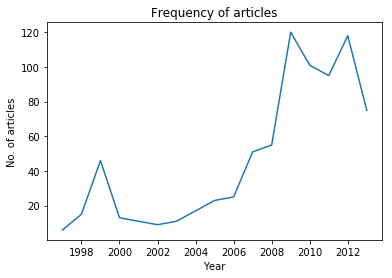

In [18]:
# year wise plot for indian express
plt.plot(x, y)
plt.xlabel('Year') 
plt.ylabel('No. of articles') 
plt.title('Frequency of articles') 
plt.show()

In [19]:

for i in range(data.shape[0]):
    data['Date'][i]=str(data['year'][i])+str(data['months'][i])+str(data['day'][i])

In [20]:
data['Date']
data['publish_month'] = data.Date.str[:6]
data['publish_year'] = data.Date.str[:4]
data['publish_month_only'] = data.Date.str[4:6]
data['publish_day_only'] = data.Date.str[6:8]

In [21]:
data.head()

,Date,Title,article,day,month,year,months,publish_month,publish_year,publish_month_only,publish_day_only
0,19970509,drug cocktail to wipe out hiv will take year,london may drugs meant to wipe out the hiv vir...,09,may,1997,05,199705,1997,05,09
1,19970622,book on healthy living for hiv positive,chennai june the tamil nadu state aids control...,22,jun,1997,06,199706,1997,06,22
2,19970804,testing hivpositive is not the end of the road,august a skit on hivaids is in progress but ye...,04,aug,1997,08,199708,1997,08,04
3,19971130,hiv positive student deported,aurangabad november a girl student from uganda...,30,nov,1997,11,199711,1997,11,30
4,19971122,world vignettes weapon to counter hiv virus,washington it may take a virus to kill a virus...,22,nov,1997,11,199711,1997,11,22


In [22]:
data['dt_date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data['dt_month'] = pd.to_datetime(data['publish_month'], format='%Y%m')

In [23]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
Date                  780 non-null object
Title                 780 non-null object
article               780 non-null object
day                   780 non-null object
month                 780 non-null object
year                  780 non-null object
months                780 non-null object
publish_month         780 non-null object
publish_year          780 non-null object
publish_month_only    780 non-null object
publish_day_only      780 non-null object
dt_date               780 non-null datetime64[ns]
dt_month              780 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(11)
memory usage: 79.3+ KB
None


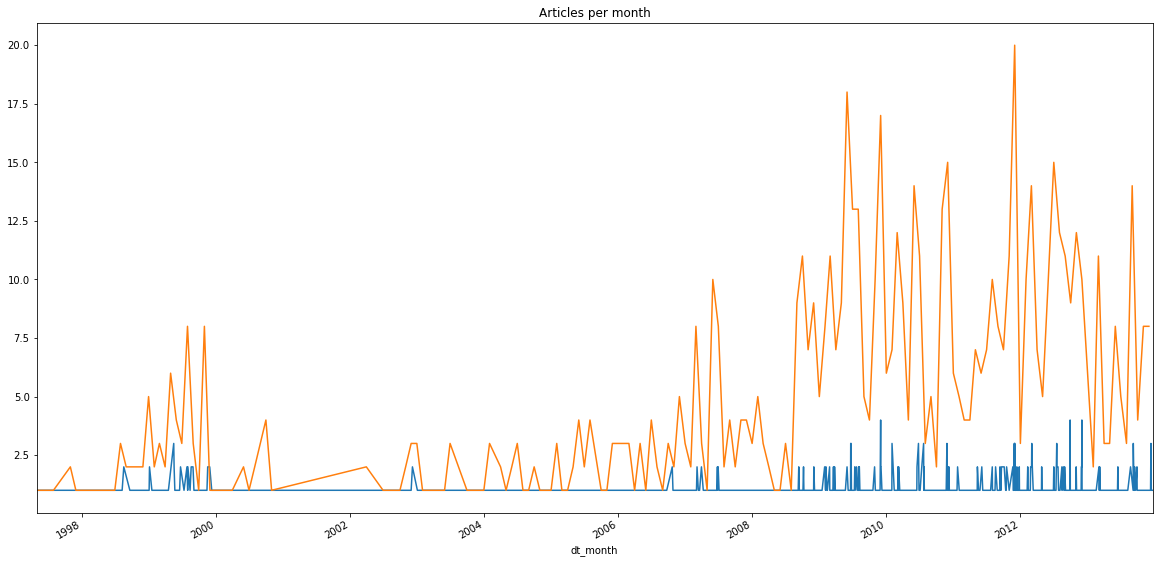

In [24]:
grp_date = data.groupby(['dt_date'])['article'].count()
grp_month = data.groupby(['dt_month'])['article'].count()

ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(20,10),title='Articles per day')
# plt.show()

ts = pd.Series(grp_month)
ts.plot(kind='line', figsize=(20,10),title='Articles per month')
plt.show()

['1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


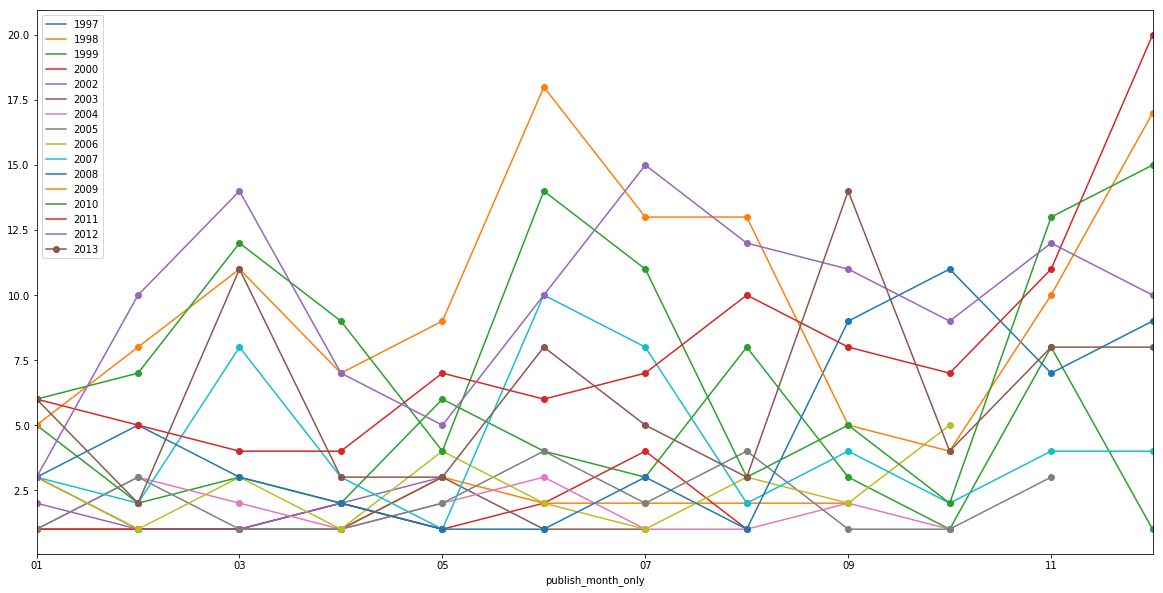

In [25]:
years=data['publish_year'].unique().tolist()
print (years)

for year in years:
    yr_slice = data.loc[data.publish_year==year]
    grp_month = yr_slice.groupby(['publish_month_only'])['article'].count()
    month_ts = pd.Series(grp_month)
    month_ts.plot(kind='line', figsize=(20,10), style='o-', legend=True, label=year)
    
plt.show()

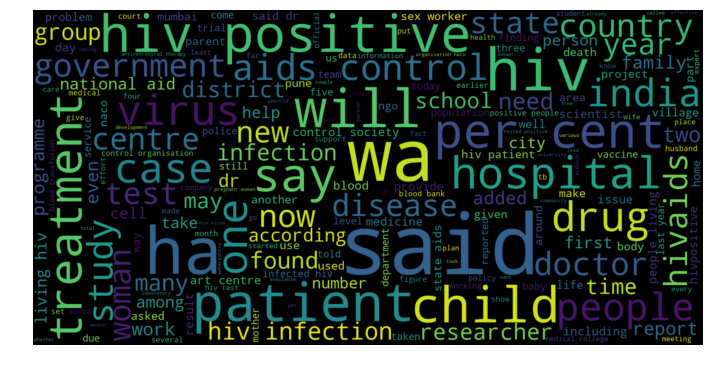

In [26]:
text = ' '
for t in data.article:
    text=text+t+' '

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
stop_words = stopwords.words('english')

In [28]:

def remove_stopwords(rev):
    rev_new = " ".join([i.lower() for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
data['article'] = data['article'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
data['article'] = [remove_stopwords(r.split()) for r in data['article']]



In [29]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(5,6))
    ax = sns.barplot(data=d, y= "word", x = "count")
    ax.set(ylabel = 'word')
    plt.show()

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


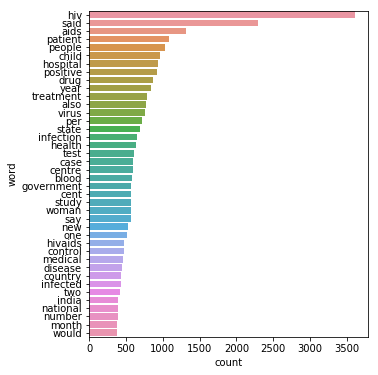

In [30]:
freq_words(data['article'],40)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


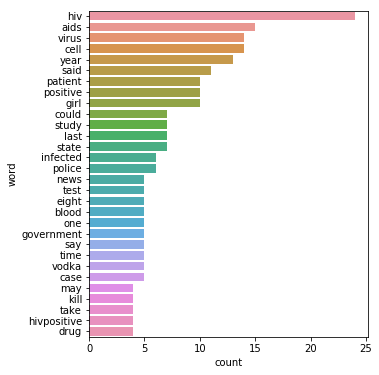

In [31]:
freq_words(data.loc[data['year']=='1997']['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


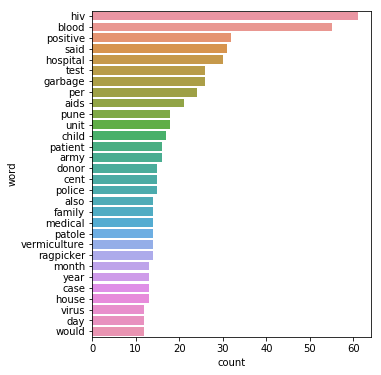

In [32]:
freq_words(data[data['year']=='1998']['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


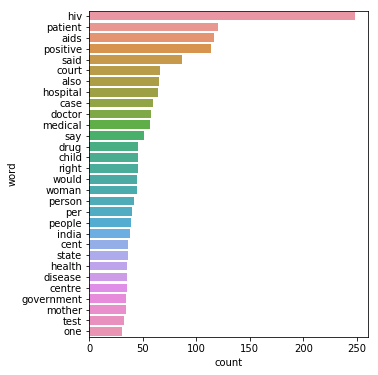

In [33]:
freq_words(data[data['year']=='1999']['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


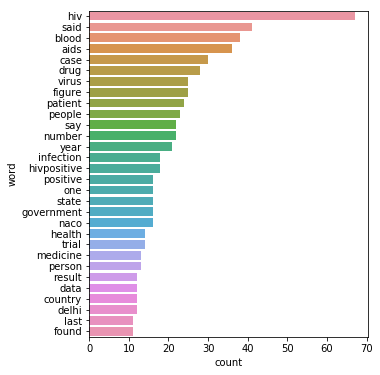

In [34]:
freq_words(data[data['year']=='2000']['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


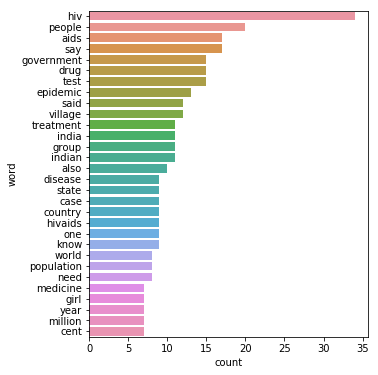

In [35]:
freq_words(data[data['year']=='2002']['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


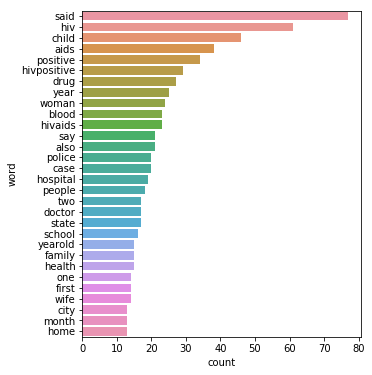

In [36]:
freq_words(data[data['year']=='2005' ]['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


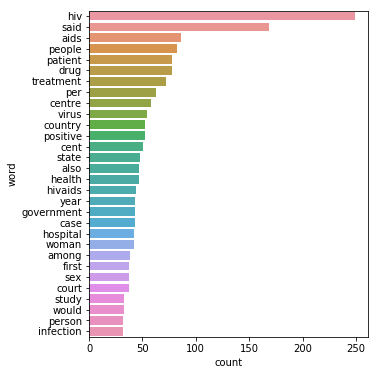

In [37]:
freq_words(data[data['year']=='2008' ]['article'],30)

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


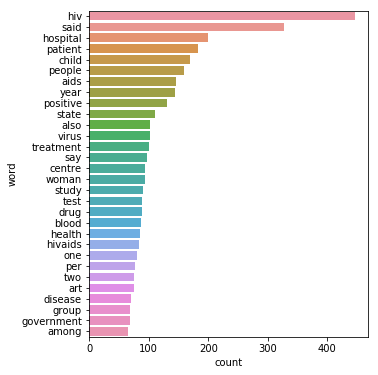

In [38]:
freq_words(data[data['year']=='2010' ]['article'],30)

In [39]:
count_vec=CountVectorizer( max_features=2500)
articles_text=count_vec.fit_transform(data['article'])

In [40]:
len(count_vec.get_feature_names())

2500

In [41]:
count_vec.get_feature_names()

['aarti',
 'abandoned',
 'ability',
 'able',
 'abortion',
 'absence',
 'abuse',
 'academy',
 'accept',
 'accepted',
 'access',
 'accompanied',
 'according',
 'account',
 'accuracy',
 'accurate',
 'accused',
 'achieve',
 'achieved',
 'acid',
 'acquired',
 'acre',
 'across',
 'act',
 'acting',
 'action',
 'active',
 'activist',
 'activity',
 'actor',
 'actually',
 'add',
 'added',
 'addict',
 'adding',
 'addition',
 'additional',
 'address',
 'addressing',
 'adequate',
 'adherence',
 'administered',
 'administration',
 'admission',
 'admit',
 'admits',
 'admitted',
 'adolescent',
 'adopt',
 'adopted',
 'adoption',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'adverse',
 'advice',
 'advised',
 'advocacy',
 'advocate',
 'affect',
 'affected',
 'affidavit',
 'afflicted',
 'afford',
 'affordable',
 'afmc',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'agarwal',
 'age',
 'aged',
 'agency',
 'agent',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'ahmedabad',
 'a

In [42]:
articles_text.shape

(780, 2500)

In [43]:
all_words = ' '.join([text for text in data['article']])
all_words = all_words.split()

fdist = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
d = words_df.nlargest(columns="count", n = 50)

In [44]:
d=d.reset_index()
del d['index']

In [45]:
d['freq']=0

In [46]:
d

,count,word,freq
0,3607,hiv,0
1,2297,said,0
2,1318,aids,0
3,1087,patient,0
4,1033,people,0
5,962,child,0
6,936,hospital,0
7,920,positive,0
8,874,drug,0
9,845,year,0


In [47]:
xl=[]
yl=[]


# for i in range(2500):
#     if count_vec.get_feature_names()[i]=='woman':
#         pos=i
count_vec.get_feature_names()[0]

'aarti'

In [48]:
# for i in range(len(d['word'])):
#     for j in range(len(count_vec.get_feature_names())):
#         if d['word'][i]==count_vec.get_feature_names()[j]:
# #             d['freq']+=1
#             for k in range(data.shape[0]):
#                 d['freq'][i]+=articles_text[k,j]
#             break
#     print(i)
            

In [49]:
# d
# del d['count']

In [50]:
# plt.figure(figsize=(5,20))
# ax = sns.barplot(data=d, y= "word", x = "freq")
# ax.set(ylabel = 'Count')
# plt.show()

In [51]:
pos=-1
for j in range(len(count_vec.get_feature_names())):
    if count_vec.get_feature_names()[j]=='woman':
        pos=j
        break
    

In [52]:
pos

2466

In [53]:
articles_text[:,2466].shape

(780, 1)

In [54]:
df=pd.DataFrame(data['publish_year'])

    

In [55]:

df['women']=articles_text[:,pos]
for i in range(data.shape[0]):
    df['women'][i]=articles_text[i,pos]

In [56]:
df=df.loc[df.women>0]
df.head()

,publish_year,women
9,1998,4
20,1998,2
26,1999,2
30,1999,1
33,1999,1


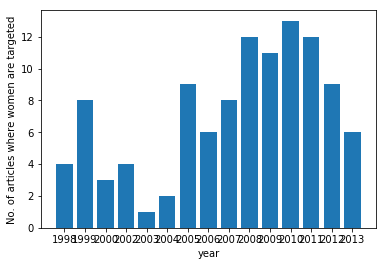

In [57]:
plt.bar(df['publish_year'],df['women'] )
plt.xlabel('year') 
plt.ylabel('No. of articles where women are targeted') 

plt.show()